In [3]:
import pandas as pd

In [338]:

def settings_to_target_df(pricing_type, operation_type, feed_in_type,grid_charge_type, grid_charging_allowed,hp=False,ev=False,costs=False,zeropv=False):
    target_df = pd.read_pickle(f"./output/00_pricing_{pricing_type}_operation_{operation_type}_fi_{feed_in_type}_ne_{str(grid_charge_type)}_gridch_{str(grid_charging_allowed)}.pkl")
    if zeropv:
        target_df = pd.read_pickle(f"./output/00_pricing_{pricing_type}_operation_{operation_type}_fi_{feed_in_type}_ne_{str(grid_charge_type)}_gridch_{str(grid_charging_allowed)}_HPnew 0PVBESS.pkl")

    
    if hp:
        target_df = pd.read_pickle(f"./output/detailed_consumption/HP_00_pricing_{pricing_type}_operation_{operation_type}_fi_{feed_in_type}_ne_{str(grid_charge_type)}_gridch_{str(grid_charging_allowed)}new.pkl")
    elif ev:
        target_df = pd.read_pickle(f"./output/detailed_consumption/EV_00_pricing_{pricing_type}_operation_{operation_type}_fi_{feed_in_type}_ne_{str(grid_charge_type)}_gridch_{str(grid_charging_allowed)}new.pkl")
    
    elif costs:
        target_df = pd.read_pickle(f"./output/detailed_financials/Costs_00_pricing_{pricing_type}_operation_{operation_type}_fi_{feed_in_type}_ne_{str(grid_charge_type)}_gridch_{str(grid_charging_allowed)}new.pkl")

    return target_df



In [377]:
def calculate_peaks_based_on_case(target_df, case):
    target_df["Sum"] = target_df.sum(axis=1)
    target_df = target_df[["Sum"]]
    heat_pump_peak_day = '2019-12-01'
    pv_peak_day = '2019-05-13'
    pv_peak = target_df["Sum"][pv_peak_day].abs().max()
    heat_pump_peak_day = '2019-12-01'
    hp_peak = target_df["Sum"][heat_pump_peak_day].abs().max()
    ev_peak_day = "2019-01-05"
    ev_peak = target_df["Sum"][ev_peak_day].abs().max()
    total_peak = target_df["Sum"].abs().max()
    
    case["worst_hp_day_peak_load"] = hp_peak
    case["worst_pv_day_peak_load"] = pv_peak
    case["worst_ev_day_peak_load"] = ev_peak
    case["worst_total_peak_load"] = total_peak
    return case

    
def calculate_agg_hp_consumption(target_df, case):
    target_df["Sum"] = target_df.sum(axis=1)
    total_hp_consumption = target_df["Sum"].sum()
    case["yearly_hp_consumption"] = total_hp_consumption
    
def calculate_agg_ev_consumption(target_df, case):
    target_df["Sum"] = target_df.sum(axis=1)
    total_ev_consumption = target_df["Sum"].sum()
    case["yearly_ev_consumption"] = total_ev_consumption

In [340]:
case_volumetric_fit_gcfalse = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "volumetric", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case = case_volumetric_fit_gcfalse
target_df_consumption = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

In [341]:
target_df_consumption_zeropvbess = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"], zeropv =True)
                                                         
                                                         

In [342]:
# with alternative regulation sgemented

case_volumetric_fit_gcfalse = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case = case_volumetric_fit_gcfalse
target_df_consumption = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

In [343]:
#### Create without everything DF 

df_hh = pd.read_pickle("./input/2019 Hamelin 500 HH.pkl")
df_hh = df_hh.apply(lambda x: x/1000)
df_hh

,0_SFH19_P_TOT,1_SFH18_P_TOT,2_SFH4_P_TOT,3_SFH30_P_TOT,4_SFH3_P_TOT,5_SFH3_P_TOT,6_SFH12_P_TOT,7_SFH5_P_TOT,8_SFH18_P_TOT,9_SFH34_P_TOT,...,490_SFH29_P_TOT,491_SFH20_P_TOT,492_SFH7_P_TOT,493_SFH5_P_TOT,494_SFH12_P_TOT,495_SFH19_P_TOT,496_SFH9_P_TOT,497_SFH4_P_TOT,498_SFH20_P_TOT,499_SFH12_P_TOT
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.293175,0.110863,0.242105,0.099929,0.201389,0.106947,0.144105,0.293785,0.154369,0.135459,...,0.087797,0.139511,0.303019,0.190762,0.118346,0.360927,0.178105,0.244014,0.248092,0.149584
2019-01-01 01:00:00+00:00,0.251500,0.109470,0.317480,0.064124,0.117100,0.174287,0.146254,0.299765,0.099125,0.118181,...,0.096889,0.186234,0.304927,0.143786,0.124170,0.243250,0.310232,0.309459,0.188331,0.162409
2019-01-01 02:00:00+00:00,0.184758,0.104753,0.302785,0.091770,0.184666,0.142115,0.154297,0.305890,0.123500,0.139023,...,0.089732,0.139974,0.228877,0.199346,0.133664,0.283116,0.211402,0.302684,0.158867,0.142355
2019-01-01 03:00:00+00:00,0.310707,0.127887,0.301232,0.105284,0.153029,0.191024,0.130964,0.255151,0.096128,0.122409,...,0.073402,0.128352,0.248215,0.196182,0.125966,0.233651,0.171106,0.300460,0.161368,0.145516
2019-01-01 04:00:00+00:00,0.232777,0.109711,0.274793,0.081925,0.122988,0.148544,0.157739,0.286189,0.149898,0.231332,...,0.111370,0.204021,0.333224,0.355735,0.148323,0.200524,1.067227,0.252807,0.220159,0.184089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.427766,0.299025,0.464582,0.263553,0.262468,0.247455,0.252974,0.239008,0.659907,0.302009,...,0.087822,0.452973,0.365195,0.423549,0.223244,0.370812,0.113927,0.369820,0.334113,0.234300
2019-12-31 20:00:00+00:00,0.334618,0.288586,0.350180,0.107254,0.167437,0.192649,0.236713,0.177049,0.253807,0.290892,...,0.094615,0.366792,0.290334,0.346197,0.220380,0.295243,0.207759,0.423236,0.213710,0.219894
2019-12-31 21:00:00+00:00,0.227095,0.256716,0.366818,0.076535,0.157720,0.145994,0.187042,0.250577,0.108642,0.192323,...,0.089120,0.321357,0.297170,0.485122,0.215385,0.255403,0.260413,0.320575,0.174942,0.176246


In [344]:
target_consumption_allzero = pd.DataFrame(index=target_df_consumption.index)

# Loop through each column in target_df_consumption
for col in target_df_consumption.columns:
    # Find the column in df_hh that starts with the same name as col (followed by _)
    matching_column = [hh_col for hh_col in df_hh.columns if hh_col.startswith(f"{col}_")]
    if matching_column:
        # Use the first matching column (assuming only one match exists)
        target_consumption_allzero[col] = df_hh[matching_column[0]].values
    else:
        # If no matching column, fill with NaN or handle as needed
        target_consumption_allzero[col] = None

<ipython-input-344-016caac07739>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  target_consumption_allzero[col] = df_hh[matching_column[0]].values
<ipython-input-344-016caac07739>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  target_consumption_allzero[col] = df_hh[matching_column[0]].values
<ipython-input-344-016caac07739>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [345]:
target_consumption_allzero

,158,262,458,348,356,136,211,236,166,333,...,291,137,400,196,307,361,199,234,193,459
2019-01-01 00:00:00+00:00,0.139511,0.160509,0.201543,0.358576,0.155910,0.212955,0.173205,0.199505,0.198267,0.197574,...,0.093982,0.095140,0.092564,0.084884,0.093985,0.100270,0.088926,0.094105,0.083181,0.094563
2019-01-01 01:00:00+00:00,0.186234,0.197582,0.196272,0.227735,0.197267,0.247873,0.134924,0.236848,0.207531,0.177802,...,0.095572,0.099403,0.089217,0.096187,0.104613,0.098321,0.095167,0.093886,0.092212,0.091167
2019-01-01 02:00:00+00:00,0.139974,0.153830,0.253953,0.322103,0.170245,0.194060,0.156468,0.182594,0.155894,0.193323,...,0.108200,0.096103,0.093128,0.109229,0.098946,0.105887,0.103124,0.090778,0.105066,0.097590
2019-01-01 03:00:00+00:00,0.128352,0.176937,0.193899,0.231850,0.158840,0.174173,0.130207,0.221352,0.132499,0.176880,...,0.080856,0.082714,0.087537,0.097771,0.081600,0.089847,0.093065,0.082958,0.094857,0.096168
2019-01-01 04:00:00+00:00,0.204021,0.148780,0.200086,0.240473,0.180989,0.199640,0.125296,0.208958,0.203260,0.186616,...,0.079368,0.090926,0.081651,0.094658,0.079658,0.088632,0.076818,0.086089,0.098325,0.093906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.364556,0.596441,0.229877,0.819753,0.910551,0.339128,1.128499,0.257173,0.219879,0.255426,...,0.197336,0.135286,0.101077,0.125468,0.120317,0.120478,0.199845,0.118818,0.113248,0.128155
2019-12-31 20:00:00+00:00,0.325766,0.424033,0.219448,0.629745,1.360186,0.297362,0.684366,0.231802,0.227650,0.266213,...,0.098557,0.156312,0.093122,0.108637,0.116975,0.120584,0.098444,0.130134,0.122580,0.126512
2019-12-31 21:00:00+00:00,0.216892,0.580813,0.291040,0.931923,1.246556,0.224859,0.472259,0.257052,0.252045,0.200053,...,0.094840,0.085328,0.085302,0.093647,0.091992,0.096101,0.096531,0.091996,0.087928,0.105317
2019-12-31 22:00:00+00:00,0.174765,0.336519,0.201511,0.934950,0.195025,0.266784,0.173103,0.231631,0.224754,0.151823,...,0.100780,0.093844,0.087521,0.095448,0.092163,0.089065,0.093018,0.094977,0.085895,0.094658


In [346]:
target_df_consumption_zeropvbess

,158,262,458,348,356,136,211,236,166,333,...,291,137,400,196,307,361,199,234,193,459
2019-01-01 00:00:00+00:00,0.139511,0.160509,0.201543,0.358576,0.15591,0.212955,0.173205,0.199505,0.198267,0.197574,...,0.093982,0.528062,0.552539,0.084884,0.093985,0.506389,0.088926,0.094105,0.515388,0.274812
2019-01-01 01:00:00+00:00,0.186234,0.197582,0.196272,0.227735,0.197267,0.247873,0.134924,0.236848,0.207531,0.177802,...,0.095572,0.520294,0.562066,0.096187,0.104613,0.527831,0.095167,0.093886,0.543834,0.868775
2019-01-01 02:00:00+00:00,2.26537,4.194957,4.741807,3.599963,2.212881,4.387589,1.887628,4.410922,3.189367,3.518291,...,0.553604,0.524298,0.60005,0.55397,0.442004,0.606396,0.613101,0.954496,0.53597,0.366956
2019-01-01 03:00:00+00:00,1.538806,8.250764,8.969687,3.469259,3.197579,6.254795,2.919821,5.21093,5.319262,5.326029,...,0.539632,0.522368,0.616883,0.537713,0.431066,0.55625,0.602159,0.544086,0.533796,0.353811
2019-01-01 04:00:00+00:00,0.204021,0.14878,4.788622,3.691867,0.180989,0.19964,3.823444,3.765532,5.454077,0.186616,...,0.079368,0.524632,1.103357,0.545085,0.079658,0.51759,0.076818,0.086089,0.535216,0.383052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,4.142481,1.793684,5.908466,0.819753,4.874935,3.207544,1.128499,0.257173,2.863074,3.478216,...,0.197336,0.591838,0.472945,0.544712,0.120317,0.884788,0.679637,0.627978,1.163587,0.737293
2019-12-31 20:00:00+00:00,3.926985,2.206072,3.414568,0.629745,5.000557,2.944222,4.135914,0.231802,2.883426,3.426644,...,0.098557,0.616354,0.476931,0.123369,0.116975,0.520543,0.610182,0.600394,0.695357,0.210479
2019-12-31 21:00:00+00:00,0.216892,0.580813,4.518551,5.263739,6.420833,0.224859,4.933961,3.428005,0.252045,4.175196,...,0.528118,0.528291,0.430973,0.316142,1.3166,0.507563,0.69037,0.638941,0.564466,0.344107
2019-12-31 22:00:00+00:00,0.174765,0.336519,3.721287,8.599175,2.835591,0.266784,2.466583,2.489503,0.224754,3.742975,...,0.537687,0.54762,0.396745,0.095448,1.140201,0.499355,0.672183,0.094977,0.582135,0.411547


In [347]:
import pandas as pd

# Assuming target_df_consumption and target_df_consumption_zeropvbess are loaded as DataFrames
mixed_dataframes = []

# Total number of columns in the DataFrames
total_columns = target_df_consumption.shape[1]

# Generate mixed DataFrames
for i in range(1, 11):
    mix_percentage = i * 10
    step = int(100 / mix_percentage)  # Determines every nth column to be taken from the second DataFrame
    mixed_df = target_consumption_allzero.copy()
    
    # Replace every nth column with columns from the second DataFrame
    mixed_df.iloc[:, ::step] = target_df_consumption.iloc[:, ::step]
    
    # Store the resulting DataFrame
    mixed_dataframes.append(mixed_df)

# Example: Access the first mixed DataFrame (10% zeropvbess)
mixed_dataframes[0]


,158,262,458,348,356,136,211,236,166,333,...,291,137,400,196,307,361,199,234,193,459
2019-01-01 00:00:00+00:00,0.139511,0.160509,0.201543,0.358576,0.155910,0.212955,0.173205,0.199505,0.198267,0.197574,...,0.093982,0.095140,0.092564,0.084884,0.093985,0.100270,0.088926,0.094105,0.083181,0.094563
2019-01-01 01:00:00+00:00,2.52927,0.197582,0.196272,0.227735,0.197267,0.247873,0.134924,0.236848,0.207531,0.177802,...,0.095572,0.099403,0.089217,0.096187,0.104613,0.098321,0.095167,0.093886,0.092212,0.091167
2019-01-01 02:00:00+00:00,2.26537,0.153830,0.253953,0.322103,0.170245,0.194060,0.156468,0.182594,0.155894,0.193323,...,0.553604,0.096103,0.093128,0.109229,0.098946,0.105887,0.103124,0.090778,0.105066,0.097590
2019-01-01 03:00:00+00:00,2.0,0.176937,0.193899,0.231850,0.158840,0.174173,0.130207,0.221352,0.132499,0.176880,...,0.539632,0.082714,0.087537,0.097771,0.081600,0.089847,0.093065,0.082958,0.094857,0.096168
2019-01-01 04:00:00+00:00,2.0,0.148780,0.200086,0.240473,0.180989,0.199640,0.125296,0.208958,0.203260,0.186616,...,0.678216,0.090926,0.081651,0.094658,0.079658,0.088632,0.076818,0.086089,0.098325,0.093906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.364556,0.596441,0.229877,0.819753,0.910551,0.339128,1.128499,0.257173,0.219879,0.255426,...,-0.0,0.135286,0.101077,0.125468,0.120317,0.120478,0.199845,0.118818,0.113248,0.128155
2019-12-31 20:00:00+00:00,3.926985,0.424033,0.219448,0.629745,1.360186,0.297362,0.684366,0.231802,0.227650,0.266213,...,0.515473,0.156312,0.093122,0.108637,0.116975,0.120584,0.098444,0.130134,0.122580,0.126512
2019-12-31 21:00:00+00:00,4.0,0.580813,0.291040,0.931923,1.246556,0.224859,0.472259,0.257052,0.252045,0.200053,...,0.528118,0.085328,0.085302,0.093647,0.091992,0.096101,0.096531,0.091996,0.087928,0.105317
2019-12-31 22:00:00+00:00,3.321622,0.336519,0.201511,0.934950,0.195025,0.266784,0.173103,0.231631,0.224754,0.151823,...,0.537687,0.093844,0.087521,0.095448,0.092163,0.089065,0.093018,0.094977,0.085895,0.094658


In [348]:
import pandas as pd

import pandas as pd

def generate_mixed_dataframes(df1, df2, step_percentage):
    """
    Generates mixed DataFrames by incrementally mixing a percentage of columns from df1 into df2.

    Args:
    - df1: First DataFrame.
    - df2: Second DataFrame.
    - step_percentage: The percentage increment for mixing per step.

    Returns:
    - List of mixed DataFrames.
    """
    mixed_dataframes = []
    total_columns = df1.shape[1]
    total_steps = int(100 / step_percentage)  # Calculate the number of steps based on the step percentage

    for i in range(1, total_steps + 1):
        mix_percentage = i * step_percentage
        num_columns_to_replace = int((mix_percentage / 100) * total_columns)  # Calculate number of columns to mix

        # Create a copy of df2
        mixed_df = df2.copy()

        # Replace the first 'num_columns_to_replace' columns with columns from df1
        columns_to_replace = list(range(num_columns_to_replace))
        mixed_df.iloc[:, columns_to_replace] = df1.iloc[:, columns_to_replace]

        # Store the resulting DataFrame
        mixed_dataframes.append(mixed_df)

    return mixed_dataframes

# Example usage
step_percentage = 10  # Change this to any percentage step you want
mixed_dataframes = generate_mixed_dataframes(target_df_consumption, target_consumption_allzero, step_percentage)

# Accessing a specific mixed DataFrame, e.g., the first one with 5% mix
mixed_dataframes[0]


,158,262,458,348,356,136,211,236,166,333,...,291,137,400,196,307,361,199,234,193,459
2019-01-01 00:00:00+00:00,0.139511,3.873068,5.452416,2.395007,0.15591,4.042532,0.173205,3.906959,4.140716,3.240431,...,0.093982,0.095140,0.092564,0.084884,0.093985,0.100270,0.088926,0.094105,0.083181,0.094563
2019-01-01 01:00:00+00:00,2.52927,3.756669,4.652483,2.744098,3.002625,2.994876,3.636788,3.978647,6.040607,3.447211,...,0.095572,0.099403,0.089217,0.096187,0.104613,0.098321,0.095167,0.093886,0.092212,0.091167
2019-01-01 02:00:00+00:00,2.26537,4.194957,4.741807,3.599963,2.212881,4.387589,2.0,4.410922,3.189367,3.518291,...,0.108200,0.096103,0.093128,0.109229,0.098946,0.105887,0.103124,0.090778,0.105066,0.097590
2019-01-01 03:00:00+00:00,2.0,4.805189,5.260218,3.469259,4.0,4.255108,3.10605,4.49515,2.847223,3.561072,...,0.080856,0.082714,0.087537,0.097771,0.081600,0.089847,0.093065,0.082958,0.094857,0.096168
2019-01-01 04:00:00+00:00,2.0,3.45823,4.788622,3.691867,3.050707,3.783663,3.823444,3.765532,5.454077,3.544323,...,0.079368,0.090926,0.081651,0.094658,0.079658,0.088632,0.076818,0.086089,0.098325,0.093906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.364556,1.793684,4.0,4.0,4.0,2.0,4.0,2.0,2.0,3.478216,...,0.197336,0.135286,0.101077,0.125468,0.120317,0.120478,0.199845,0.118818,0.113248,0.128155
2019-12-31 20:00:00+00:00,3.926985,2.0,3.570562,4.0,4.0,2.0,4.0,0.231802,2.0,3.426644,...,0.098557,0.156312,0.093122,0.108637,0.116975,0.120584,0.098444,0.130134,0.122580,0.126512
2019-12-31 21:00:00+00:00,4.0,2.0,0.29104,4.0,1.246556,2.449478,4.0,2.0,2.0,4.0,...,0.094840,0.085328,0.085302,0.093647,0.091992,0.096101,0.096531,0.091996,0.087928,0.105317
2019-12-31 22:00:00+00:00,3.321622,3.344321,4.0,4.640648,0.195025,3.706012,2.466583,2.0,3.745465,3.742975,...,0.100780,0.093844,0.087521,0.095448,0.092163,0.089065,0.093018,0.094977,0.085895,0.094658


In [349]:
results_pv = []

for mixed_df in mixed_dataframes:
    result = {}
    calculate_peaks_based_on_case(mixed_df,result)

    results_pv.append(result)

<Axes: >

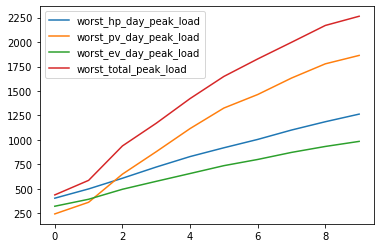

In [350]:
pd.DataFrame(results_pv).plot()

In [351]:
case_volumetric_fit_gcfalse = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case = case_volumetric_fit_gcfalse
target_df_consumption_constant = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

mixed_dataframes_constant = generate_mixed_dataframes(target_df_consumption_constant, target_consumption_allzero, step_percentage)

results_pv = []

for mixed_df in mixed_dataframes_constant:
    result = {}
    calculate_peaks_based_on_case(mixed_df,result)

    results_pv.append(result)

In [352]:
case_volumetric_fit_gcfalse = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case = case_volumetric_fit_gcfalse
target_df_consumption_constant = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

mixed_dataframes_constant = generate_mixed_dataframes(target_df_consumption_constant, target_consumption_allzero, step_percentage)


results_pv_constant = []

for mixed_df in mixed_dataframes_constant:
    result = {}
    calculate_peaks_based_on_case(mixed_df,result)

    results_pv_constant.append(result)

<Axes: >

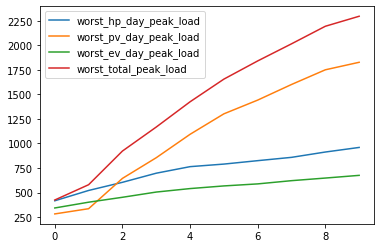

In [353]:
pd.DataFrame(results_pv_constant).plot()

In [354]:
df_pv = pd.DataFrame(results_pv)
df_pv_constant = pd.DataFrame(results_pv_constant)

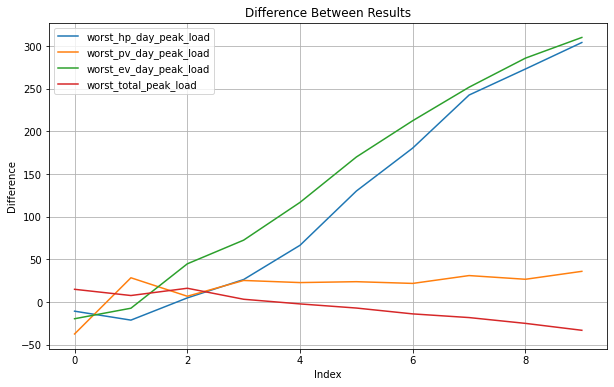

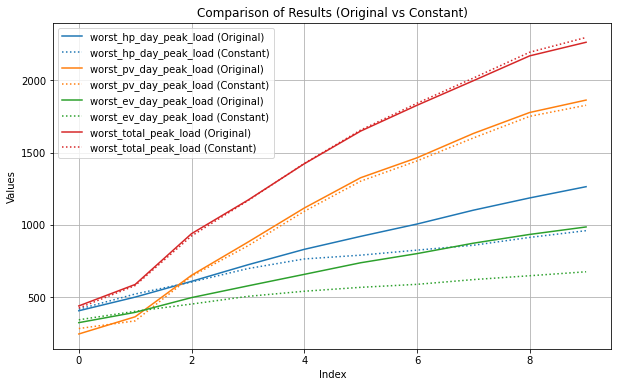

In [355]:
import matplotlib.pyplot as plt
# Plotting the difference
difference = df_pv - df_pv_constant
difference.plot(title="Difference Between Results", figsize=(10, 6))
plt.ylabel("Difference")
plt.xlabel("Index")
plt.grid(True)
plt.show()

# Overlaying plots with matching colors for dotted lines
plt.figure(figsize=(10, 6))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get default color cycle

for idx, column in enumerate(df_pv.columns):
    plt.plot(df_pv.index, df_pv[column], label=f"{column} (Original)", color=color_cycle[idx % len(color_cycle)])
    plt.plot(df_pv_constant.index, df_pv_constant[column], linestyle='dotted',
             label=f"{column} (Constant)", color=color_cycle[idx % len(color_cycle)])

plt.title("Comparison of Results (Original vs Constant)")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [356]:
df_pv.columns = ["Heat pump peak day", "Feed-in peak day", "EV peak day", "Yearly peak day"]

df_pv_constant.columns = ["Heat pump peak day", "Feed-in peak day", "EV peak day", "Yearly peak day"]

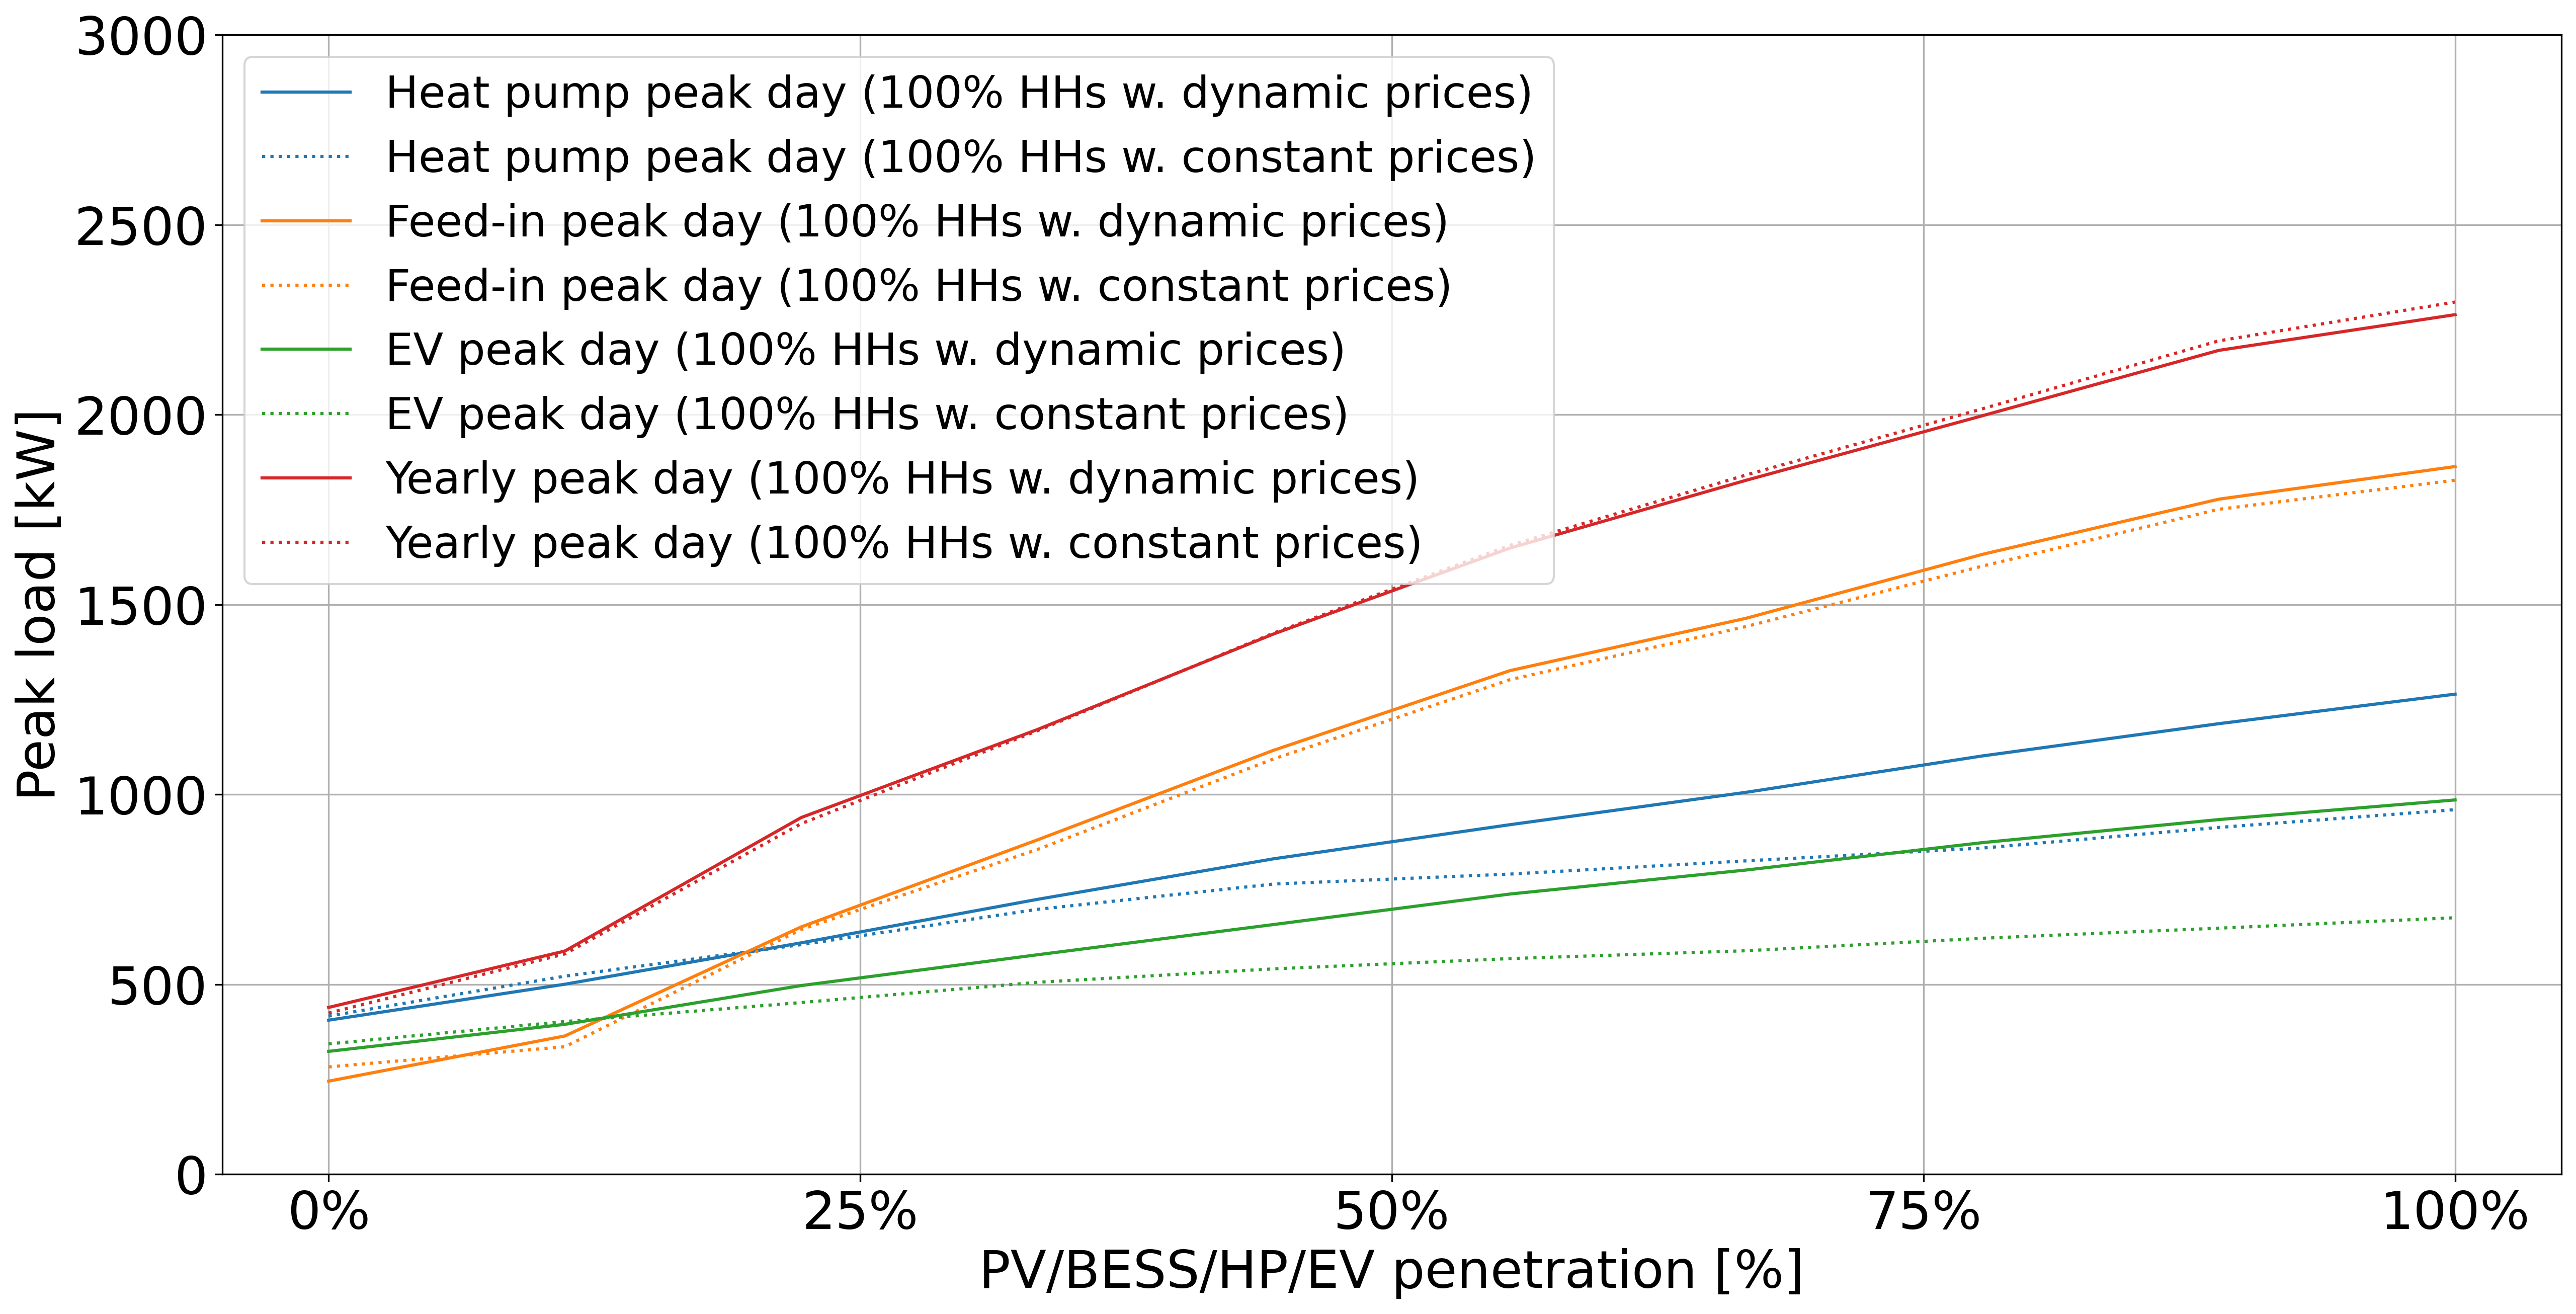

In [357]:
import numpy as np
fsize= 25
plt.figure(figsize=(20, 10),dpi=300)
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get default color cycle

# Normalize indices to percentages
x_percentage = np.linspace(0, 100, len(df_pv.index))

for idx, column in enumerate(df_pv.columns):
    plt.plot(x_percentage, df_pv[column], label=f"{column} (100% HHs w. dynamic prices)", color=color_cycle[idx % len(color_cycle)])
    plt.plot(x_percentage, df_pv_constant[column], linestyle='dotted',
             label=f"{column} (100% HHs w. constant prices)", color=color_cycle[idx % len(color_cycle)])

# Adjust font sizes
plt.xlabel("PV/BESS/HP/EV penetration [%]", fontsize=fsize)
plt.ylabel("Peak load [kW]", fontsize=fsize)
plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0%", "25%", "50%", "75%", "100%"], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize-4)
plt.ylim(0, 3000)
plt.grid(True)
plt.show()


In [358]:
#### compare volumetric
case_constant = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_dynamic = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case = case_constant
target_df_consumption_constant = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

case = case_dynamic
target_df_consumption_dynamic = settings_to_target_df(case["pricing_type"], case["operation_type"], case["feed_in_tariff"],case["grid_charge_type"],
                                                     case["grid_charging_allowed"])

In [359]:
step_percentage =  10 # Change this to any percentage step you want
mixed_dataframes = generate_mixed_dataframes(target_df_consumption_constant,target_consumption_allzero, step_percentage)

# Accessing a specific mixed DataFrame, e.g., the first one with 5% mix
mixed_dataframes[0]

results_pv_constant = []

for mixed_df in mixed_dataframes:
    result = {}
    calculate_peaks_based_on_case(mixed_df,result)

    results_pv_constant.append(result)

In [360]:
step_percentage =  10 # Change this to any percentage step you want
mixed_dataframes = generate_mixed_dataframes(target_df_consumption_dynamic,target_consumption_allzero, step_percentage)

# Accessing a specific mixed DataFrame, e.g., the first one with 5% mix
mixed_dataframes[0]

results_pv_dynamic = []

for mixed_df in mixed_dataframes:
    result = {}
    calculate_peaks_based_on_case(mixed_df,result)

    results_pv_dynamic.append(result)
    

In [361]:
df_pv = pd.DataFrame(results_pv_constant)
df_pv_dynamic = pd.DataFrame(results_pv_dynamic)

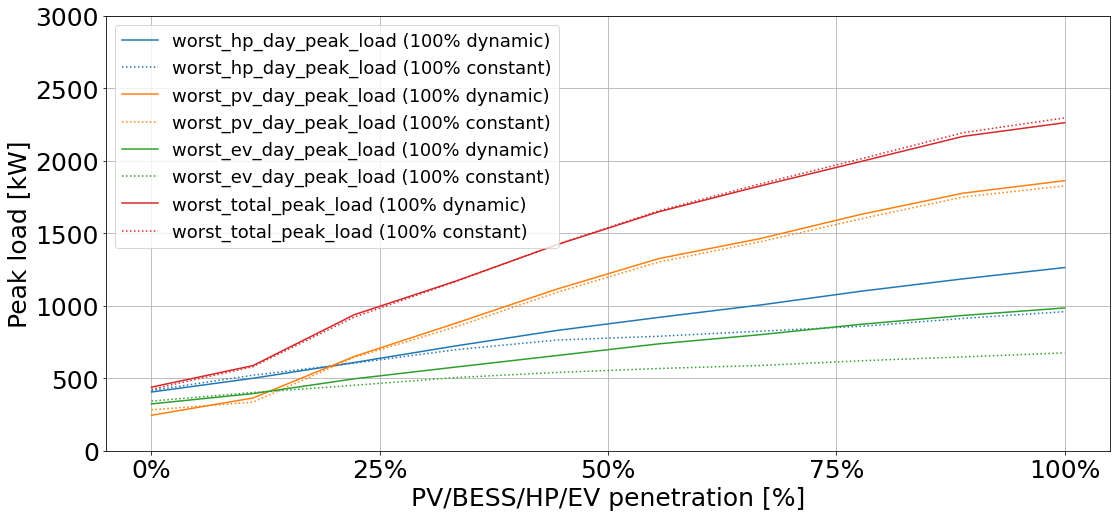

In [362]:
import numpy as np
fsize= 25
plt.figure(figsize=(18, 8))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get default color cycle

# Normalize indices to percentages
x_percentage = np.linspace(0, 100, len(df_pv.index))

for idx, column in enumerate(df_pv.columns):
    plt.plot(x_percentage, df_pv_dynamic[column], label=f"{column} (100% dynamic)", color=color_cycle[idx % len(color_cycle)])
    plt.plot(x_percentage, df_pv[column], linestyle='dotted',
             label=f"{column} (100% constant)", color=color_cycle[idx % len(color_cycle)])

# Adjust font sizes
plt.xlabel("PV/BESS/HP/EV penetration [%]", fontsize=fsize)
plt.ylabel("Peak load [kW]", fontsize=fsize)
plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0%", "25%", "50%", "75%", "100%"], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=18)
plt.ylim(0, 3000)
plt.grid(True)
plt.show()


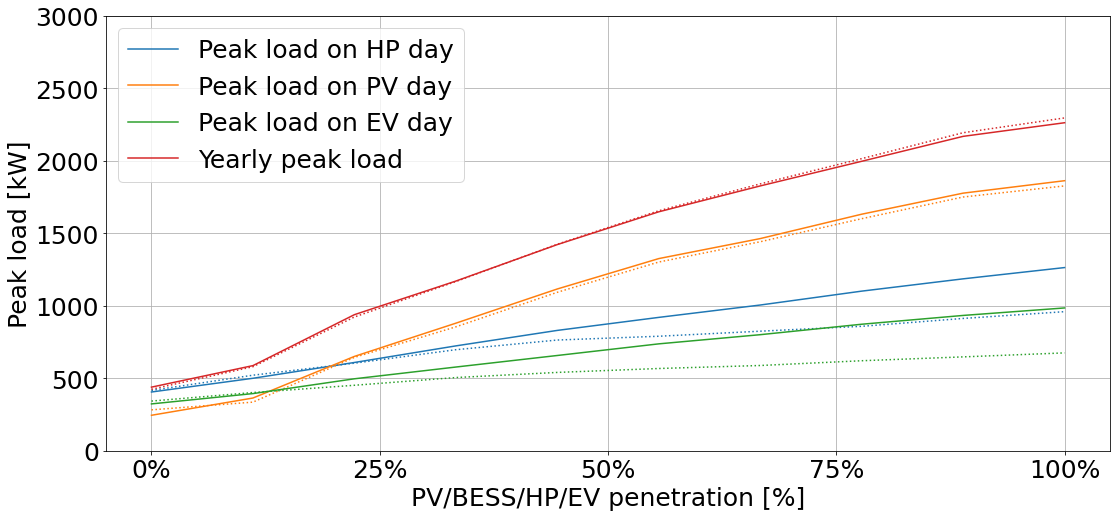

In [363]:
import numpy as np
import matplotlib.pyplot as plt

fsize = 25
plt.figure(figsize=(18, 8))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Get default color cycle

# Normalize indices to percentages
x_percentage = np.linspace(0, 100, len(df_pv.index))

# Define legend labels
legend_labels = ["Peak load on HP day", "Peak load on PV day", "Peak load on EV day", "Yearly peak load"]

# Plot each column with solid and dotted lines
for idx, column in enumerate(df_pv.columns):
    plt.plot(x_percentage, df_pv_dynamic[column], label=None, color=color_cycle[idx % len(color_cycle)])
    plt.plot(x_percentage, df_pv[column], linestyle='dotted', label=None, color=color_cycle[idx % len(color_cycle)])

# Add legend with increased font size and reduced entries
for idx, label in enumerate(legend_labels):
    plt.plot([], [], color=color_cycle[idx], label=label)  # Add a legend entry for each color

plt.xlabel("PV/BESS/HP/EV penetration [%]", fontsize=fsize)
plt.ylabel("Peak load [kW]", fontsize=fsize)
plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0%", "25%", "50%", "75%", "100%"], fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(fontsize=fsize)  # Increased legend font size
plt.ylim(0, 3000)
plt.grid(True)
plt.show()

In [364]:
pd.DataFrame(results_pv_constant)

,worst_hp_day_peak_load,worst_pv_day_peak_load,worst_ev_day_peak_load,worst_total_peak_load
0,416.396121,282.580658,343.127298,424.304994
1,521.529883,335.669177,401.989336,580.123244
2,604.482340,644.403313,451.999473,922.985706
3,697.389284,855.096388,505.326827,1167.644651
4,764.067701,1093.567174,540.712508,1424.846487
5,790.251237,1302.151498,567.744394,1655.746995
6,825.108459,1442.117590,588.432848,1841.160915
7,858.784538,1601.153815,621.281444,2015.390036
8,913.083379,1750.744904,647.884237,2194.249120
9,959.811304,1827.297191,675.371306,2296.310000


In [365]:
pd.DataFrame(results_pv_constant)["worst_total_peak_load"]

0     424.304994
1     580.123244
2     922.985706
3    1167.644651
4    1424.846487
5    1655.746995
6    1841.160915
7    2015.390036
8    2194.249120
9    2296.310000
Name: worst_total_peak_load, dtype: float64

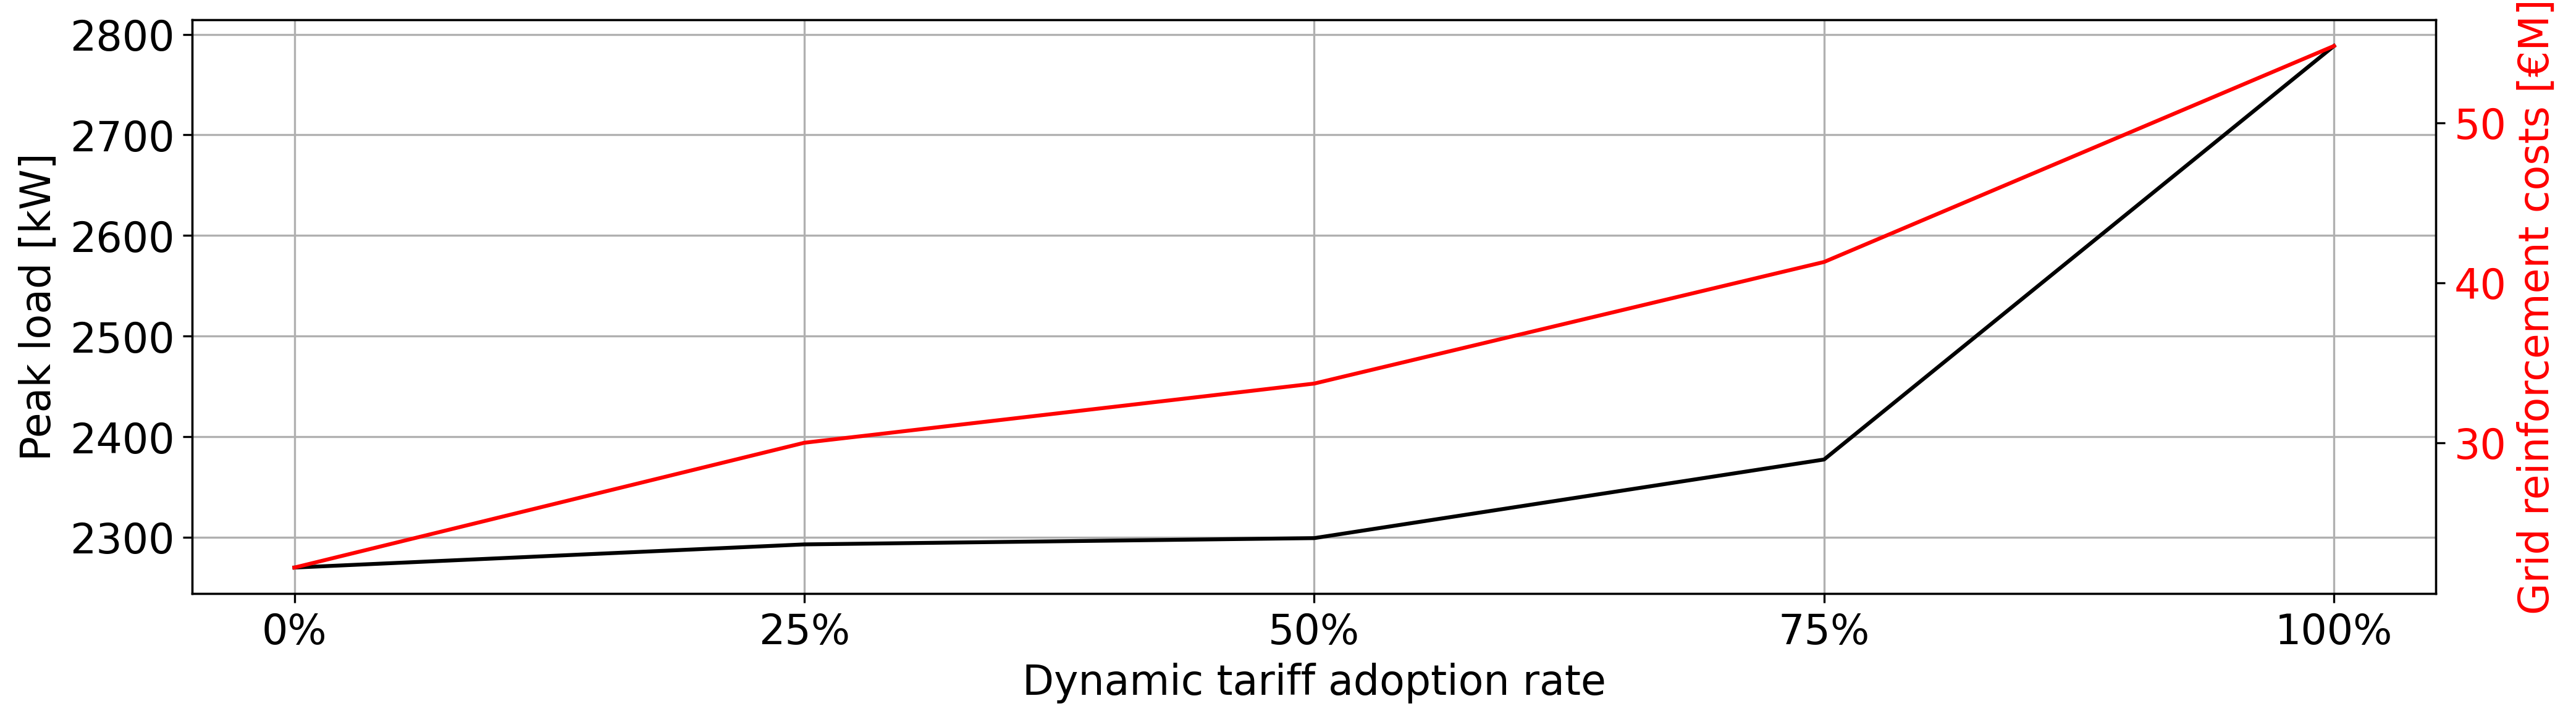

In [366]:
x = [2270, 2293.025601, 2299.264462, 2377.397415, 2788.421902]
y = [22.2, 30, 33.7, 41.3, 54.8]

# Set a high DPI for better sharpness
fig, ax1 = plt.subplots(figsize=(14, 4), dpi=300)

# Plot the first line on the primary y-axis
ax1.plot(range(len(x)), x, label="X Values", color="black")
ax1.set_xlabel("Dynamic tariff adoption rate", fontsize=16)
ax1.set_ylabel("Peak load [kW]", color="black", fontsize=16)
ax1.tick_params(axis='y', labelcolor="black", labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=16)
ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(range(len(y)), y, label="Y Values", color="red")
ax2.set_ylabel("Grid reinforcement costs [€M]", color="red", fontsize=16)
ax2.tick_params(axis='y', labelcolor="red", labelsize=16)

# Adjust layout
fig.tight_layout()

plt.show()

In [367]:
correlation = np.corrcoef(x, y)[0, 1]
correlation

0.9127528217739708

# Build correlation with more data points

In [368]:
step_percentage = 25

case_volumetric_fit_gcfalse_constant = {"name":"Constant Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "volumetric", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_volumetric_fit_gcfalse = {"name":"Dynamic Volumetric_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "volumetric", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_volumetric_dynamic_gcfalse_constant = {"name":"Constant Volumetric_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "volumetric", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_volumetric_dynamic_gcfalse = {"name":"Dynamic Volumetric_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "volumetric", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_peak_fit_gcfalse_constant = {"name":"Constant Peak_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "peak", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_peak_fit_gcfalse = {"name":"Dynamic Peak_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "peak", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_peak_dynamic_gcfalse_constant = {"name":"Constant Peak_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "peak", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_peak_dynamic_gcfalse = {"name":"Dynamic Peak_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "peak", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_rotating_fit_gcfalse_constant = {"name":"Constant Rotating_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "rotating", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_rotating_fit_gcfalse = {"name":"Dynamic Rotating_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "rotating", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_rotating_dynamic_gcfalse_constant = {"name":"Constant Rotating_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "rotating", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_rotating_dynamic_gcfalse = {"name":"Dynamic Rotating_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "rotating", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_segmented_fit_gcfalse_constant = {"name":"Constant Segmented_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_segmented_fit_gcfalse = {"name":"Dynamic Segmented_FIT","feed_in_tariff" :"fit", "grid_charge_type" : "segmented", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}

case_segmented_dynamic_gcfalse_constant = {"name":"Constant Segmented_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "segmented", "pricing_type" : "constant", "operation_type" : "dynamic","grid_charging_allowed":"False"}
case_segmented_dynamic_gcfalse = {"name":"Dynamic Segmented_DynFeed","feed_in_tariff" :"dynamic", "grid_charge_type" : "segmented", "pricing_type" : "dynamic", "operation_type" : "dynamic","grid_charging_allowed":"False"}




In [418]:
def calculate_zero_adoption_peak(case):
    print("---")
    target_df_consumption = settings_to_target_df(
        case["pricing_type"],
        case["operation_type"],
        case["feed_in_tariff"],
        case["grid_charge_type"],
        case["grid_charging_allowed"]
    )
    res = {}
    print(case)
    print(target_df_consumption)
    output = calculate_peaks_based_on_case(target_df_consumption, res)
    return output["worst_total_peak_load"]

def calculate_peaks_for_case(case_constant, case_dynamic, step_percentage):
    
    target_df_consumption_constant = settings_to_target_df(
        case_constant["pricing_type"],
        case_constant["operation_type"],
        case_constant["feed_in_tariff"],
        case_constant["grid_charge_type"],
        case_constant["grid_charging_allowed"]
    )
    print(f"case constant: {case_constant}. Peak load: {target_df_consumption_constant.sum(axis=1).max()}")
    
    
    target_df_consumption_dynamic = settings_to_target_df(
        case_dynamic["pricing_type"],
        case_dynamic["operation_type"],
        case_dynamic["feed_in_tariff"],
        case_dynamic["grid_charge_type"],
        case_dynamic["grid_charging_allowed"]
    )
    print(f"case dynamic: {case_dynamic}. Peak load: {target_df_consumption_dynamic.sum(axis=1).max()}")

    mixed_dataframes = generate_mixed_dataframes(
        target_df_consumption_constant, target_df_consumption_dynamic, step_percentage
    )

    results = []
    for mixed_df in mixed_dataframes:
        result = {"worst_total_peak_load":mixed_df.sum(axis=1).abs().max()}
        print(f"result: {result}")
        results.append(result)


    result_df = pd.DataFrame(results)
    print(result_df)
    return result_df["worst_total_peak_load"].values

def process_cases(cases, step_percentage):
    all_results = []

    for case_constant, case_dynamic in cases:
        # Calculate 0% adoption peak load
        print(case_constant)
        target_df_consumption_constant = settings_to_target_df(
        case_constant["pricing_type"],
        case_constant["operation_type"],
        case_constant["feed_in_tariff"],
        case_constant["grid_charge_type"],
        case_constant["grid_charging_allowed"]
        )
        zero_adoption_peak = target_df_consumption_constant.sum(axis=1).abs().max()

        # Calculate adoption rates (25%, 50%, 75%, 100%)
        result_df_values = calculate_peaks_for_case(case_dynamic,case_constant, step_percentage)
        print(result_df_values)

        # Prepare the data
        adoption_rates = [0] + [step_percentage * i for i in range(1, len(result_df_values) + 1)]
        peak_loads = [zero_adoption_peak] + list(result_df_values)
        case_name = case_constant["name"].split(" ")[1]

        for adoption_rate, peak_load in zip(adoption_rates, peak_loads):
            all_results.append({
                "adoption_rate": adoption_rate,
                "case_name": case_name,
                "peak_load": peak_load
            })

    return pd.DataFrame(all_results)

# Define all cases
cases = [
    (case_volumetric_fit_gcfalse_constant, case_volumetric_fit_gcfalse),
    (case_volumetric_dynamic_gcfalse_constant, case_volumetric_dynamic_gcfalse),
    (case_peak_fit_gcfalse_constant, case_peak_fit_gcfalse),
    (case_peak_dynamic_gcfalse_constant, case_peak_dynamic_gcfalse),
    (case_rotating_fit_gcfalse_constant, case_rotating_fit_gcfalse),
    (case_rotating_dynamic_gcfalse_constant, case_rotating_dynamic_gcfalse),
    (case_segmented_fit_gcfalse_constant, case_segmented_fit_gcfalse),
    (case_segmented_dynamic_gcfalse_constant, case_segmented_dynamic_gcfalse)
]

# Process all cases
step_percentage = 25
final_df = process_cases(cases, step_percentage)


{'name': 'Constant Volumetric_FIT', 'feed_in_tariff': 'fit', 'grid_charge_type': 'volumetric', 'pricing_type': 'constant', 'operation_type': 'dynamic', 'grid_charging_allowed': 'False'}
case constant: {'name': 'Dynamic Volumetric_FIT', 'feed_in_tariff': 'fit', 'grid_charge_type': 'volumetric', 'pricing_type': 'dynamic', 'operation_type': 'dynamic', 'grid_charging_allowed': 'False'}. Peak load: 2788.4219023242
case dynamic: {'name': 'Constant Volumetric_FIT', 'feed_in_tariff': 'fit', 'grid_charge_type': 'volumetric', 'pricing_type': 'constant', 'operation_type': 'dynamic', 'grid_charging_allowed': 'False'}. Peak load: 1298.040669511127
result: {'worst_total_peak_load': 2293.0256006492}
result: {'worst_total_peak_load': 2299.264462192202}
result: {'worst_total_peak_load': 2377.397414621967}
result: {'worst_total_peak_load': 2788.4219023242}
   worst_total_peak_load
0            2293.025601
1            2299.264462
2            2377.397415
3            2788.421902
[2293.02560065 2299.2644

In [419]:
final_df

,adoption_rate,case_name,peak_load
0,0,Volumetric_FIT,2270.215044
1,25,Volumetric_FIT,2293.025601
2,50,Volumetric_FIT,2299.264462
3,75,Volumetric_FIT,2377.397415
4,100,Volumetric_FIT,2788.421902
5,0,Volumetric_DynFeed,2496.459234
6,25,Volumetric_DynFeed,2495.941186
7,50,Volumetric_DynFeed,2494.490600
8,75,Volumetric_DynFeed,2494.405963
9,100,Volumetric_DynFeed,2787.834156


In [420]:
def add_grid_reinforcement_costs(df):
    costs_mapping = {
        "Volumetric_FIT": [22.2, 30.0, 33.7, 41.3, 54.8],
        "Volumetric_DynFeed": [25.7, 32.9, 36.8, 43.4, 57.5],
        "Segmented_FIT": [21.4, 21.2, 21.5, 21.9, 21.8],
        "Segmented_DynFeed": [25.7, 25.4, 25.7, 25.1, 25.3],
        "Rotating_FIT": [22.4, 22.2, 22.6, 22.5, 22.7],
        "Rotating_DynFeed": [25.6, 25.5, 25.8, 25.2, 25.7],
        "Peak_FIT": [22.4, 22.2, 23.1, 23.0, 24.2],
        "Peak_DynFeed": [32.9, 32.5, 32.2, 32.0, 32.4]
    }

    grid_costs = []
    for _, row in df.iterrows():
        adoption_rate_index = int(row["adoption_rate"] / 25)  # Map adoption rate to index (0, 25, 50, 75, 100)
        case_name = row["case_name"]
        grid_cost = costs_mapping.get(case_name, [0, 0, 0, 0, 0])[adoption_rate_index]
        grid_costs.append(grid_cost)

    df["Grid reinforcement costs"] = grid_costs
    return df

final_df_w_reinforcement = add_grid_reinforcement_costs(final_df)
final_df_w_reinforcement



,adoption_rate,case_name,peak_load,Grid reinforcement costs
0,0,Volumetric_FIT,2270.215044,22.2
1,25,Volumetric_FIT,2293.025601,30.0
2,50,Volumetric_FIT,2299.264462,33.7
3,75,Volumetric_FIT,2377.397415,41.3
4,100,Volumetric_FIT,2788.421902,54.8
5,0,Volumetric_DynFeed,2496.459234,25.7
6,25,Volumetric_DynFeed,2495.941186,32.9
7,50,Volumetric_DynFeed,2494.490600,36.8
8,75,Volumetric_DynFeed,2494.405963,43.4
9,100,Volumetric_DynFeed,2787.834156,57.5


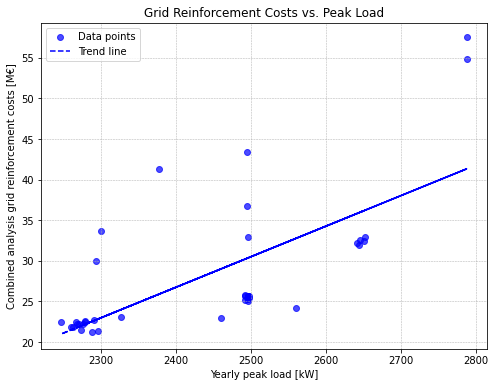

In [421]:
df = final_df_w_reinforcement

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['peak_load'], df['Grid reinforcement costs'], color='blue', alpha=0.7, label='Data points')

# Fit a linear trend line
z = np.polyfit(df['peak_load'], df['Grid reinforcement costs'], 1)
p = np.poly1d(z)
plt.plot(df['peak_load'], p(df['peak_load']), "--", color="blue", label="Trend line")

# Labeling
plt.xlabel('Yearly peak load [kW]')
plt.ylabel('Combined analysis grid reinforcement costs [M€]')
plt.title('Grid Reinforcement Costs vs. Peak Load')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show plot
plt.show()

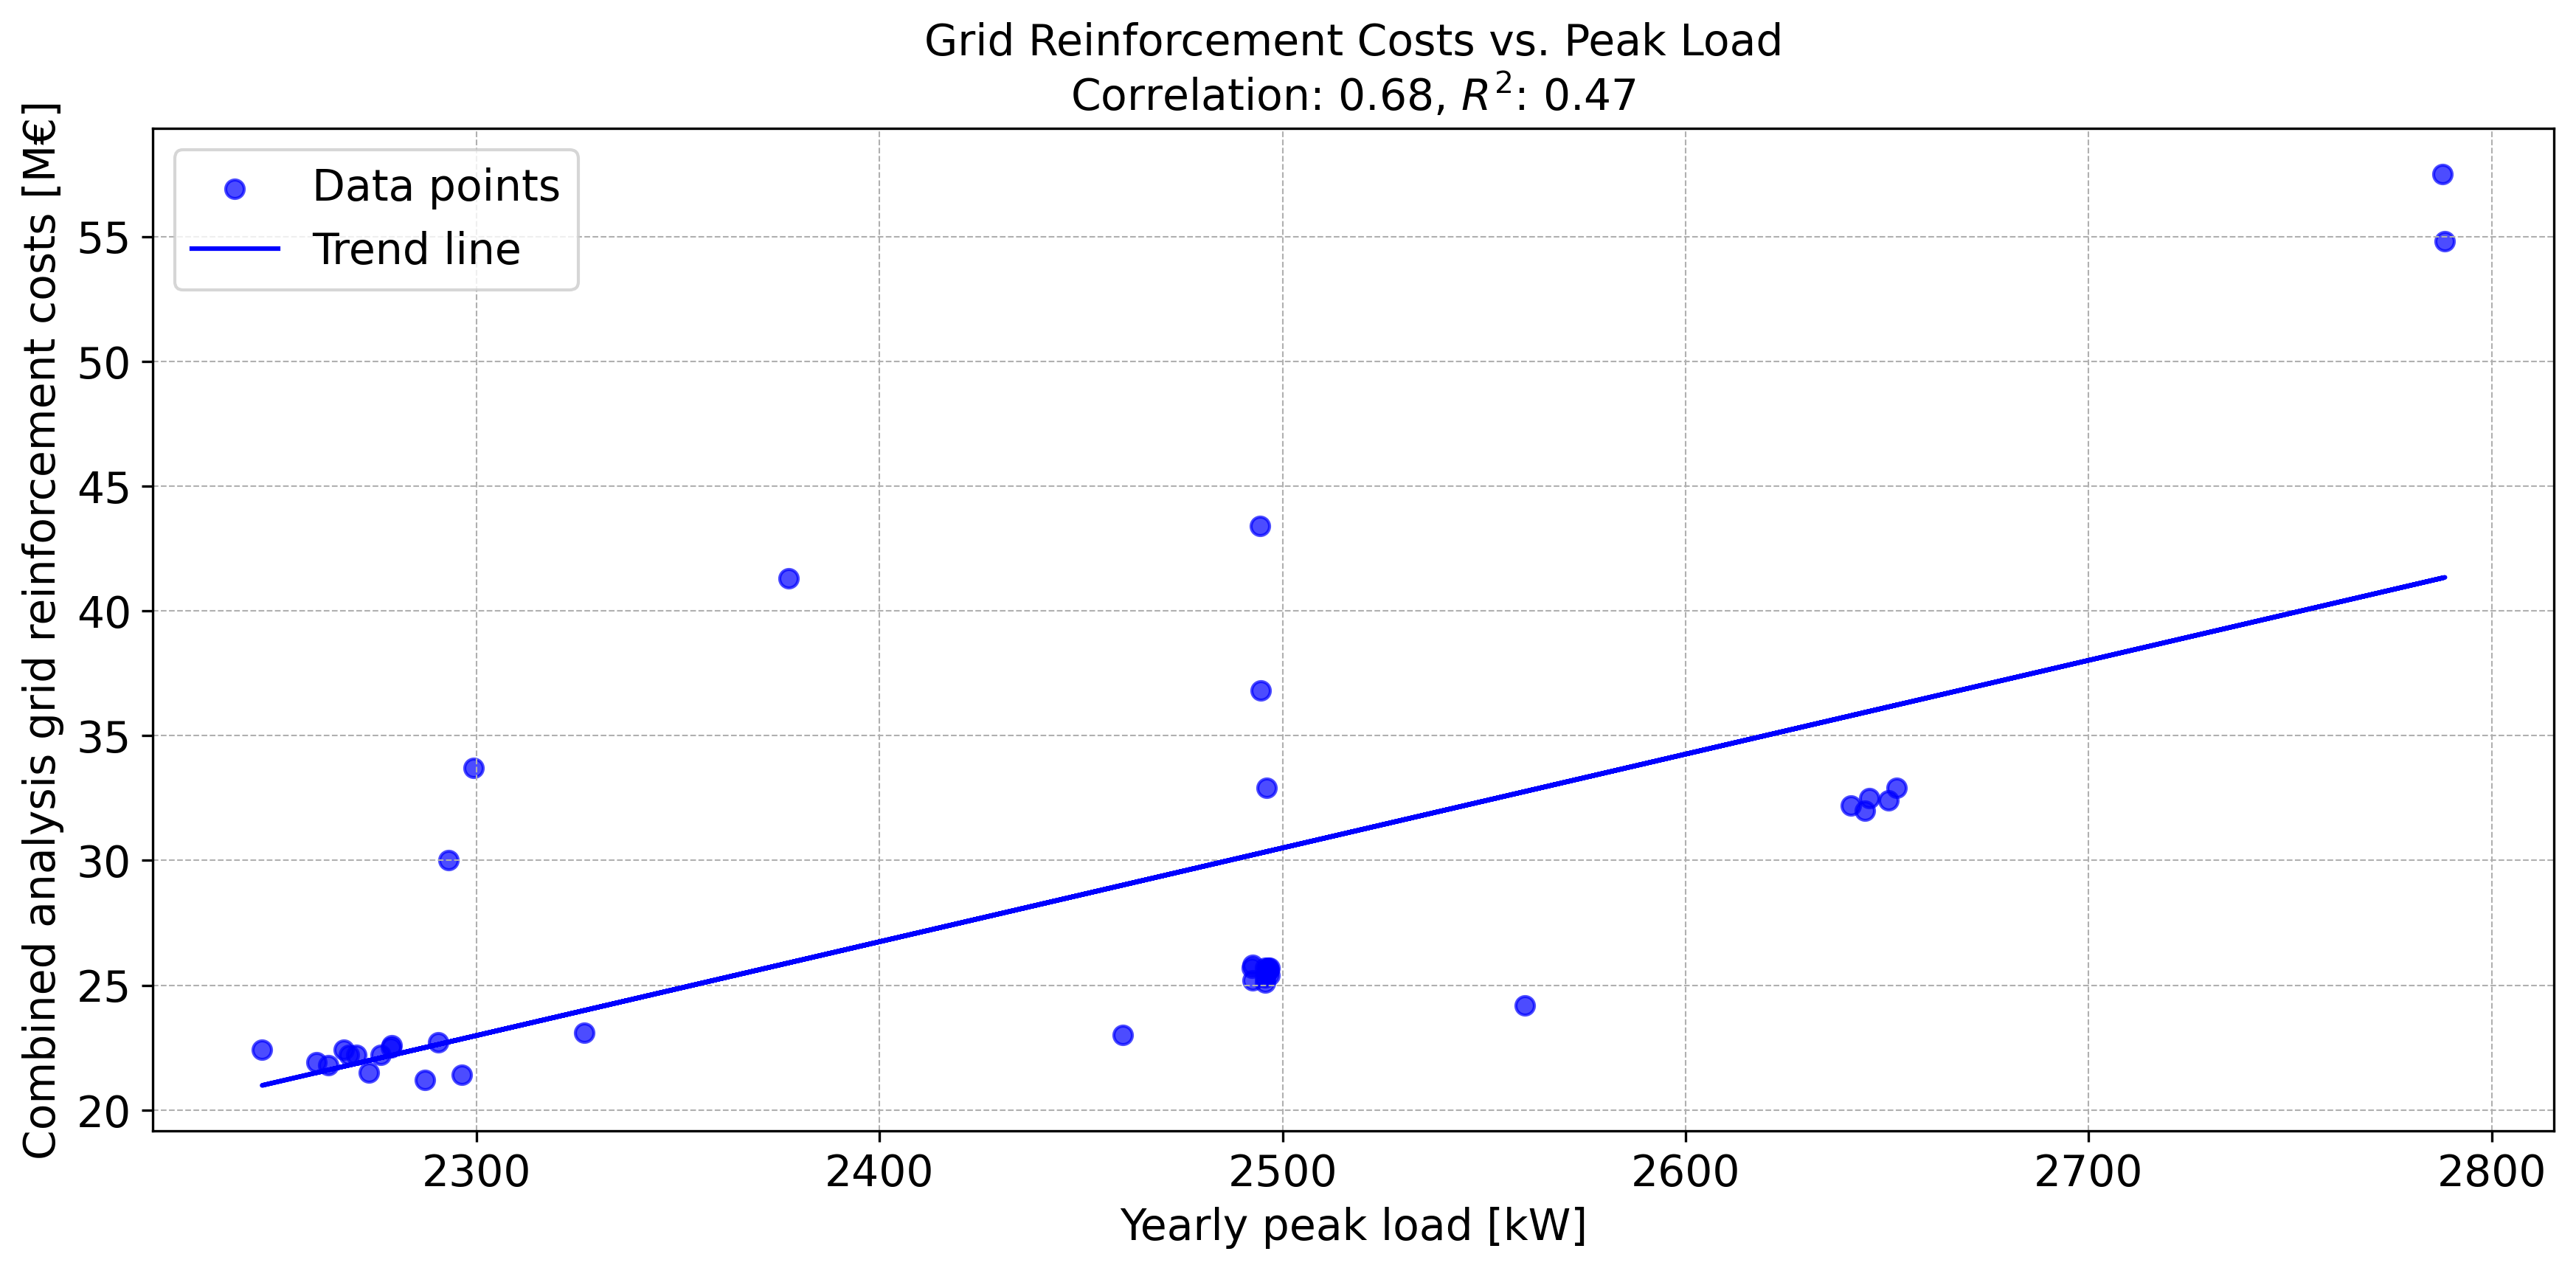

In [422]:
import numpy as np
import matplotlib.pyplot as plt

df = final_df_w_reinforcement

# Scatter plot
plt.figure(figsize=(14, 6),dpi=300)
plt.scatter(df['peak_load'], df['Grid reinforcement costs'], color='blue', alpha=0.7, label='Data points')

# Fit a linear trend line
z = np.polyfit(df['peak_load'], df['Grid reinforcement costs'], 1)
p = np.poly1d(z)

# Calculate correlation coefficient and R^2
correlation = np.corrcoef(df['peak_load'], df['Grid reinforcement costs'])[0, 1]
r_squared = correlation**2

# Plot trend line
plt.plot(df['peak_load'], p(df['peak_load']), color="blue", label="Trend line")

# Labeling with font size 16
plt.xlabel('Yearly peak load [kW]', fontsize=14)
plt.ylabel('Combined analysis grid reinforcement costs [M€]', fontsize=14)
plt.title(f'Grid Reinforcement Costs vs. Peak Load\nCorrelation: {correlation:.2f}, $R^2$: {r_squared:.2f}', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Show plot
plt.show()
